### 1. Import Libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import time
from collections import Counter
from googletrans import Translator
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("dataset.csv")
data = df.copy()
data.head()

,Job,Company,City,Work Type,Work Model,Salary,Experience Level,Skills
0,Manager Data et Analytics F/H,Deloitte,"Mechouar, Casablanca-Settat, Morocco (Hybrid)",Full-time,Hybrid,NaN,NaN,"Coaching, DWH, ETL, Esprit, Microsoft Business..."
1,Data Analyst Senior,Leyton,Casablanca Metropolitan Area (On-site),Full-time,On-site,NaN,Mid-Senior level,"CRM, Microsoft Excel, PowerPoint, Python, Sale..."
2,Data Engineer F/H,Zenika,Casablanca Metropolitan Area (Hybrid),Full-time,Hybrid,NaN,Mid-Senior level,"Apache Kafka, Apache Spark, Google Cloud Platf..."
3,Senior Data Scientist,Leyton,"Casablanca-Settat, Morocco (Hybrid)",Full-time,Hybrid,NaN,Associate,"Decision Trees, Linear Regression, Python, Sup..."
4,Backend Senior Developer H/F - Casablanca,Eskimoz,Casablanca Metropolitan Area (Hybrid),Full-time,Hybrid,NaN,Mid-Senior level,"PHP, الإنجليزية, الاتصالات ثنائية اللغة, التوا..."


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Job               257 non-null    object 
 1   Company           257 non-null    object 
 2   City              257 non-null    object 
 3   Work Type         248 non-null    object 
 4   Work Model        228 non-null    object 
 5   Salary            0 non-null      float64
 6   Experience Level  187 non-null    object 
 7   Skills            249 non-null    object 
dtypes: float64(1), object(7)
memory usage: 16.2+ KB


### 2. Exploratory Data Analysis(EDA)

#### Number of jobs collected

In [6]:
nb_jobs = data.shape[0]
print("Number of jobs:",nb_jobs)

Number of jobs: 257


#### Top hiring Cities 

In [91]:
lst = []
for i in range(0,257):
        cities = data['City'][i].replace(',',' ').replace('-',' ').replace('Mechouar','Casablanca').replace('Prefecture','Casablanca').replace('Sidi','Sidi_Ifni').replace('Agdal','Rabat').replace('Dar','Casablanca').replace('Aîn','Casablanca').replace('Fès','Fez').split(' ')
        lst.append(cities[0])
        i+=1

count_cities = Counter(lst)
unique_cities = list(count_cities.items())
cnames = []
ccount = []
for j in range(0,11):
        city_name = unique_cities[j][0]
        city_count = unique_cities[j][1]
        cnames.append(city_name)
        ccount.append(city_count)
print(cnames)
print(ccount)

['Casablanca', 'Rabat', 'Fez', 'Morocco', 'Temara', 'Marrakesh', 'Tangier', 'Agadir', 'Sidi_Ifni', 'Dakhla', 'Meknes']
[156, 66, 4, 12, 1, 9, 5, 1, 1, 1, 1]


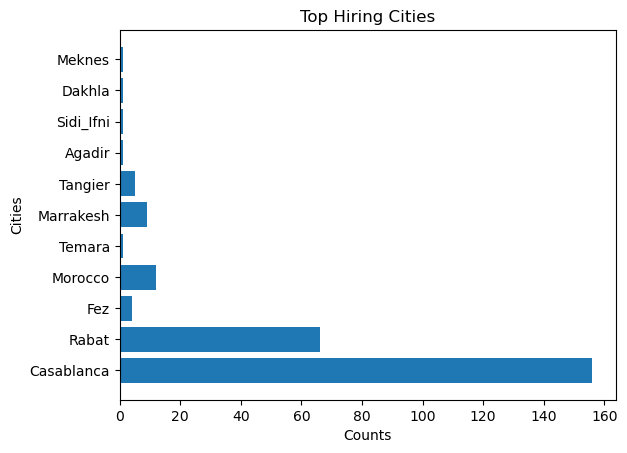

In [68]:
fig,ax = plt.subplots()
ax.barh(cnames, width=ccount)
plt.xlabel("Counts")
plt.ylabel("Cities")
plt.title("Top Hiring Cities")
plt.show()

<font color=sky-blue>Interpretation</font><br>
Casablanca and Rabat offer more jobs opportunities compared to other cities.

#### Most model work In demand(Full-time, Part-time etc)

In [69]:
#Replace some of work type with NaN
l = ["Mid-Senior level","Entry level","Associate","Director"]
data['Work Type']=data['Work Type'].replace(l, np.nan)
data['Work Type'].value_counts()

Work Type
Full-time     202
Internship      8
Part-time       6
Contract        4
Temporary       1
Name: count, dtype: int64

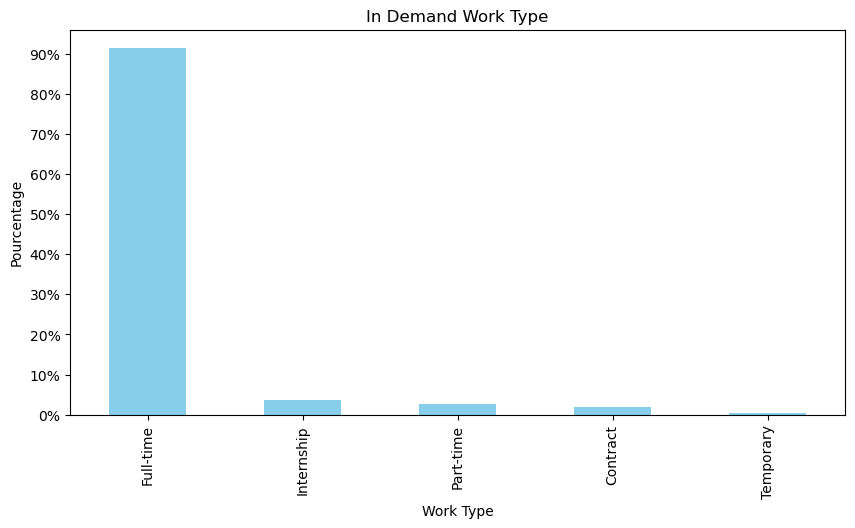

In [70]:
type_jobs = data['Work Type'].value_counts()
len_jobs = type_jobs.sum()
ax = type_jobs.plot(kind='bar', figsize=(10,5),  color='skyblue')
plt.xlabel("Work Type")
plt.ylabel("Pourcentage")
plt.title("In Demand Work Type")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len_jobs,decimals=None))
ax.yaxis.set_major_locator(mtick.MultipleLocator(base=0.1*len_jobs))
plt.show()

<font color=sky-blue>Interpretation</font><br>
Full-time jobs are high demand types of work.

#### Analysing Work Model(Remote, on-site, hybride)

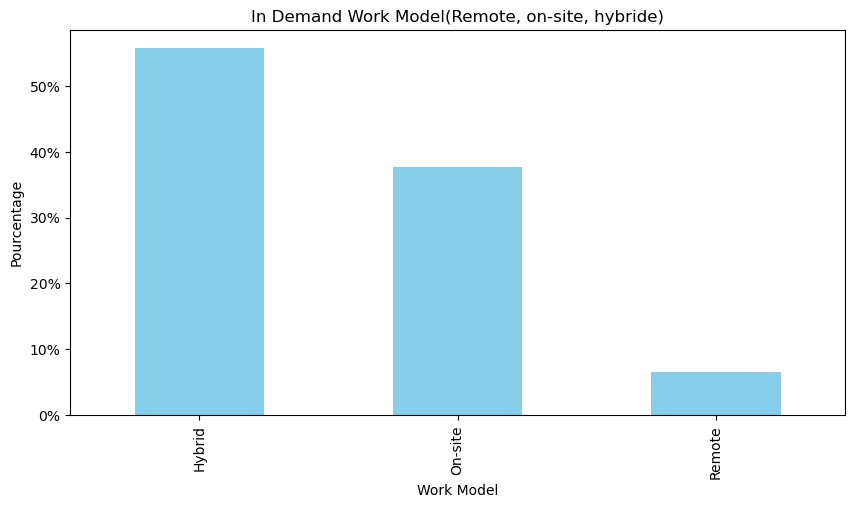

In [71]:
model_work = data['Work Model'].value_counts()
len_work_model = model_work.sum()
ax = model_work.plot(kind='bar', figsize=(10,5),  color='skyblue')
plt.xlabel("Work Model")
plt.ylabel("Pourcentage")
plt.title("In Demand Work Model(Remote, on-site, hybride)")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len_work_model,decimals=None))
ax.yaxis.set_major_locator(mtick.MultipleLocator(base=0.1*len_work_model))
plt.show()

<font color=sky-blue>Interpretation</font><br>
Hybride type of work is the most demanded in job markets.

#### Analysing Seniority Level(Mid-Senior level, Associate, Entry level etc)

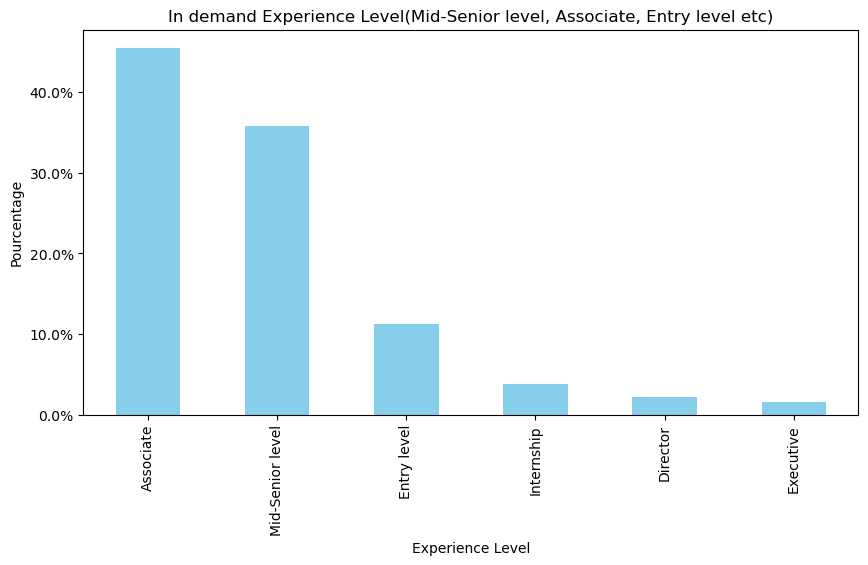

In [72]:
seniority = data['Experience Level'].value_counts()
len_seniority = seniority.sum()
ax = seniority.plot(kind='bar', figsize=(10,5),  color='skyblue')
plt.xlabel("Experience Level")
plt.ylabel("Pourcentage")
plt.title("In demand Experience Level(Mid-Senior level, Associate, Entry level etc)")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len_seniority,decimals=None))
ax.yaxis.set_major_locator(mtick.MultipleLocator(base=0.1*len_seniority))
plt.show()

<font color=sky-blue>Interpretation</font><br>
Associate work dominates other experience levels.

#### Analysing Companies 

In [73]:
data['Company'].value_counts()

Company
CGI                                                  17
Deloitte                                             14
Orange Business Maroc                                12
SQLI                                                 10
Société Générale - Africa Technologies & Services    10
                                                     ..
BCG Platinion                                         1
JESA S.A                                              1
CREDIT DU MAROC                                       1
MAROCLEAR                                             1
Avito.ma - Frontier Digital Ventures                  1
Name: count, Length: 89, dtype: int64

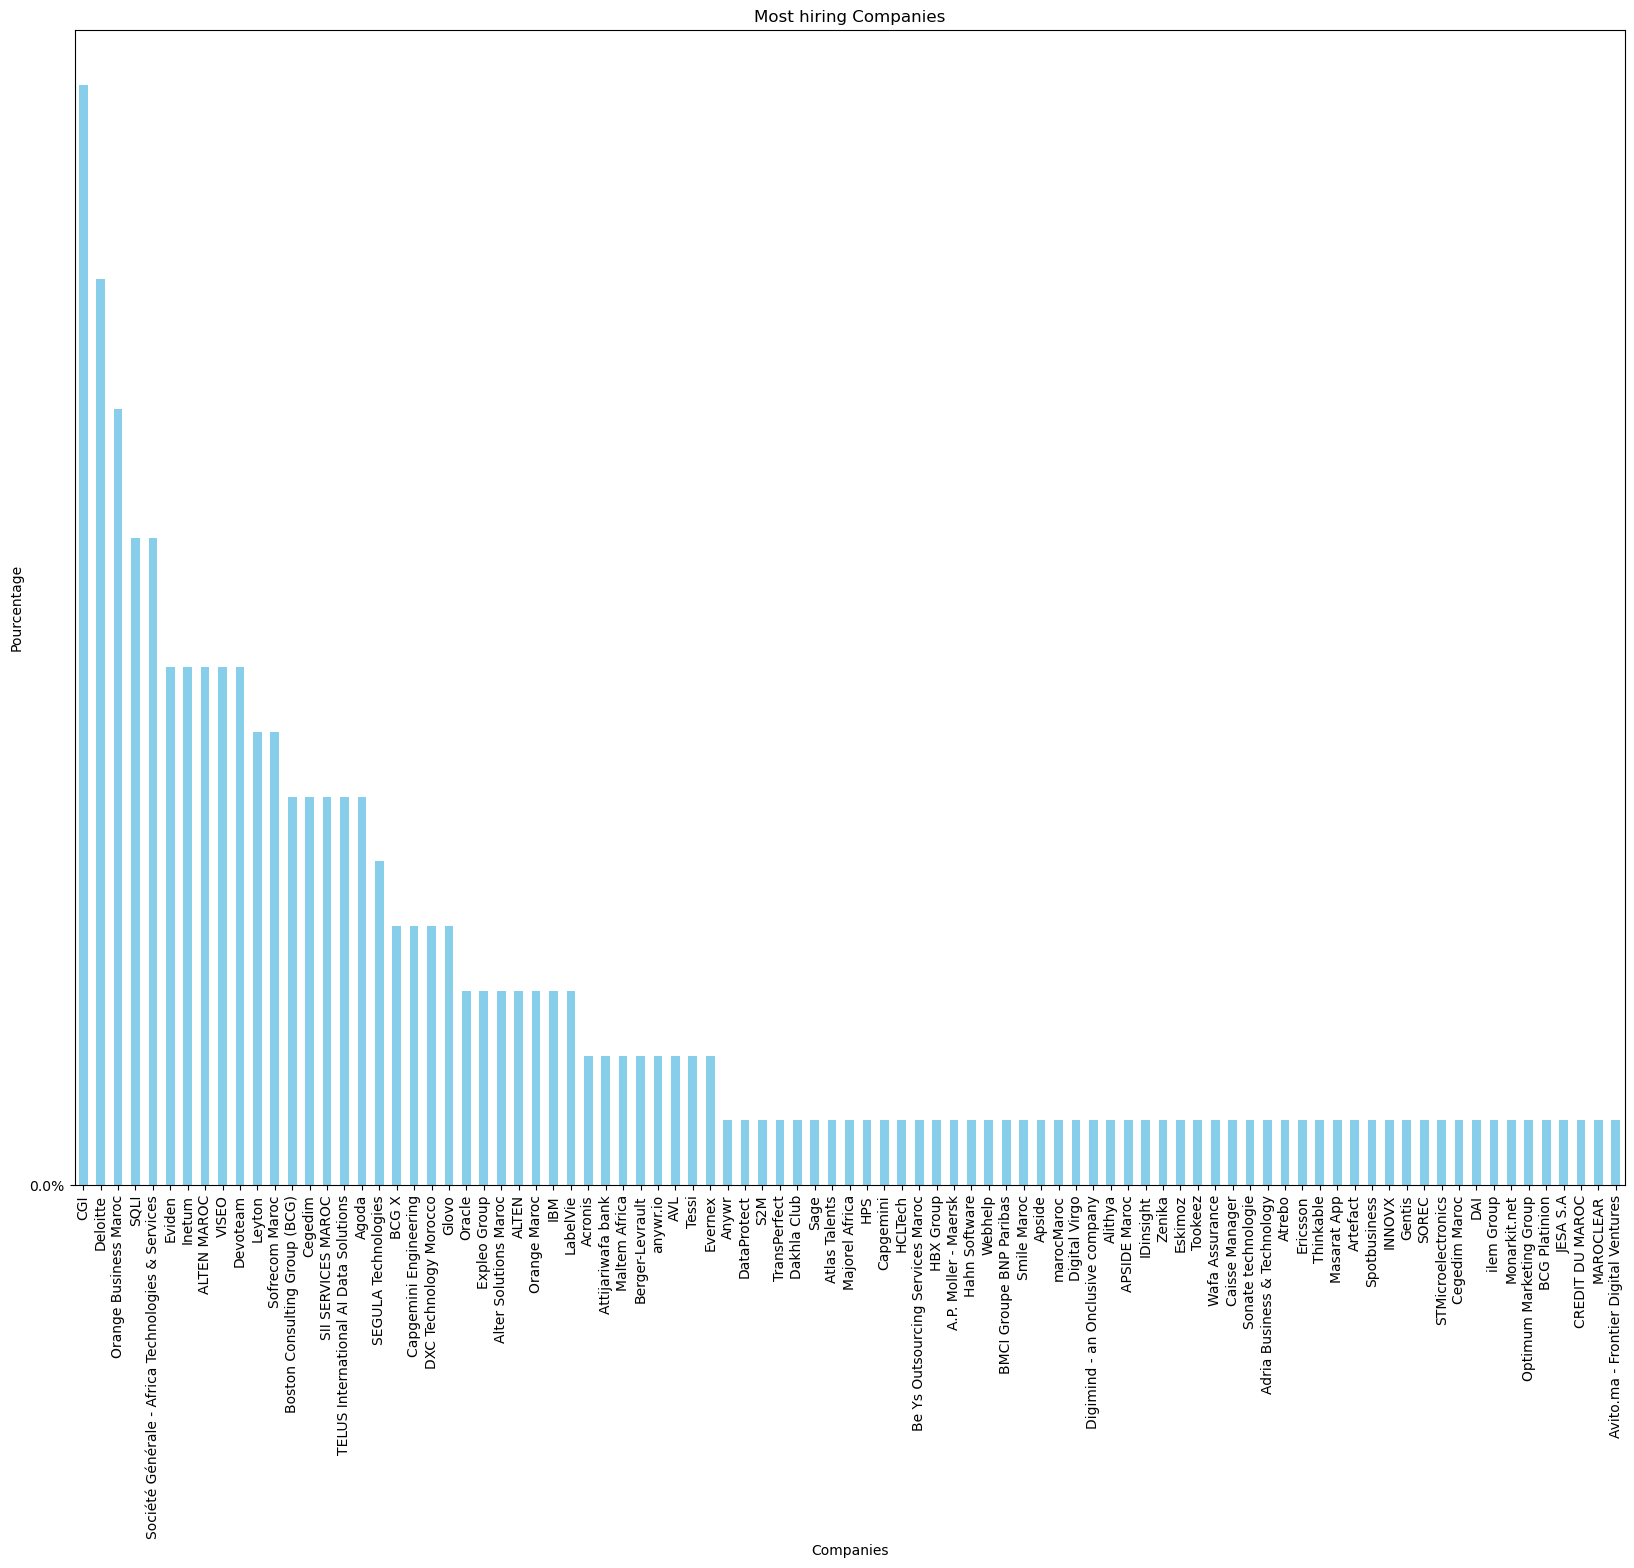

In [74]:
companies = data['Company'].value_counts()
len_companies = companies.sum()
ax = companies.plot(kind='bar', figsize=(20,15),  color='skyblue')
plt.xlabel("Companies")
plt.ylabel("Pourcentage")
plt.title("Most hiring Companies")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len_companies,decimals=None))
ax.yaxis.set_major_locator(mtick.MultipleLocator(base=0.1*len_companies))
plt.show()

<font color=sky-blue>Interpretation</font><br>


##### In demand Programming langages 

In [3]:
#Translation
#Translate Arabic skills into English
translator = Translator()
skills = data["Skills"]
time.sleep(2)
df_skills = pd.DataFrame(skills)

def translate_text(text):
    try:
        translation = translator.translate(text, src='ar', dest='en')
        return translation.text
    except Exception as e:
        print("error")
        return text
df_skills['Skills'] = df_skills['Skills'].apply(translate_text)

In [5]:
df_skills.head()

,Skills
0,"Coaching, DWH, ETL, Esprit, Microsoft Business..."
1,"CRM, microsoft Excel, PowerPoint, Python, Sale..."
2,"Apache Kafka, Apache Spark, Google Cloud Plate..."
3,"Decision Trees, Linear Regression, Python, Sup..."
4,"Php, English, bilateral communications, commun..."


In [19]:
data.insert(8, "Skills_translated", df_skills, True)

In [21]:
#Count skills
skills_list = [skill.strip() for sublist in data['Skills_translated'].str.split(',') for skill in sublist]#skill in sublist of splitted skills
count_skills = pd.Series(skills_list).value_counts()
count_skills

English               56
Communications        40
Java                  27
French                24
Angular               18
                      ..
Web Applications       1
Shipping and Glip      1
and Data Consolies     1
CI                     1
Financial Lists        1
Name: count, Length: 1174, dtype: int64

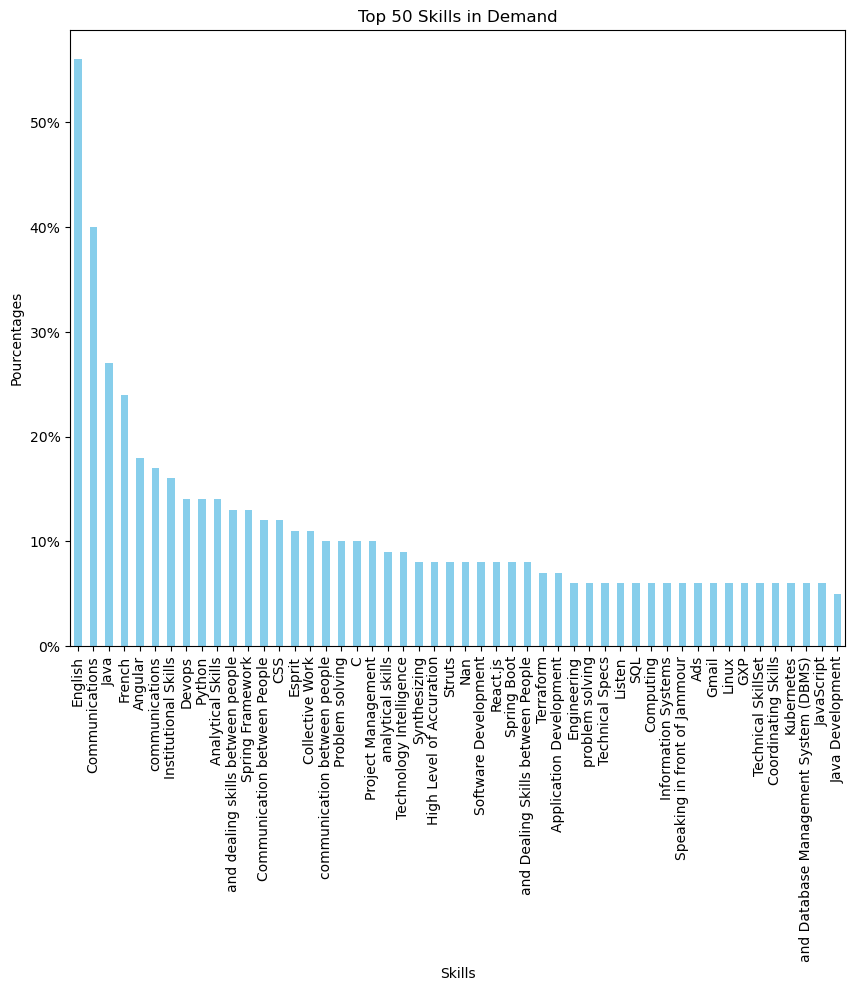

In [22]:
top_skills = count_skills.head(50)
ax = top_skills.plot(kind='bar', figsize=(10,8),  color='skyblue')
plt.xlabel("Skills")
plt.ylabel("Pourcentages")
plt.title("Top 50 Skills in Demand")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
ax.yaxis.set_major_locator(mtick.MultipleLocator(base=10))
plt.show()

<font color=sky-blue>Interpretation</font><br>


##### Most Job titles in demand

In [81]:
count_jobs = data['Job'].value_counts()
job_dict = dict(sorted(count_jobs.items()))
job_dict

{' Développeur VBA': 1,
 ' Expert SysOps Anglophone(F/H) ': 1,
 ' Expert Test et Automatisation (F/H)': 1,
 ' Expert Webmethods (F/H)': 1,
 ' Leader Technique Windev (F/H) ': 1,
 '(Junior/Senior) Software Engineer - X Delivery': 1,
 '(Senior) Software Engineer, Quality - X Delivery': 1,
 '.NET Developer (m/f)': 1,
 'ADAS Software Architect': 1,
 'ADAS Technical Functional Designer ': 1,
 'ANALYSTE SUPPORT ERP DYNAMICS D365 H/F': 1,
 'ARCHITECTE JAVA/JEE': 1,
 'Administrateur Bases de données (H/F)- Maroc': 1,
 'Administrateur Bases de données EKIP': 1,
 'Administrateur Systèmes et Bases de Données': 1,
 'Administrateur de systèmes et de bases de données/Administratrice de systèmes et de bases de données': 1,
 'Agent Réservations': 1,
 'Analyste Sales Crédits': 1,
 'Analyste des défauts EE': 1,
 'Animateur Optimisation Economique Cellule H/F': 1,
 'Architecte Expérimenté Cloud F/H': 1,
 'Architecte Front': 1,
 'Architecte SI Expérimenté F/H': 1,
 'Architecte Solutions H/F': 1,
 'Archite

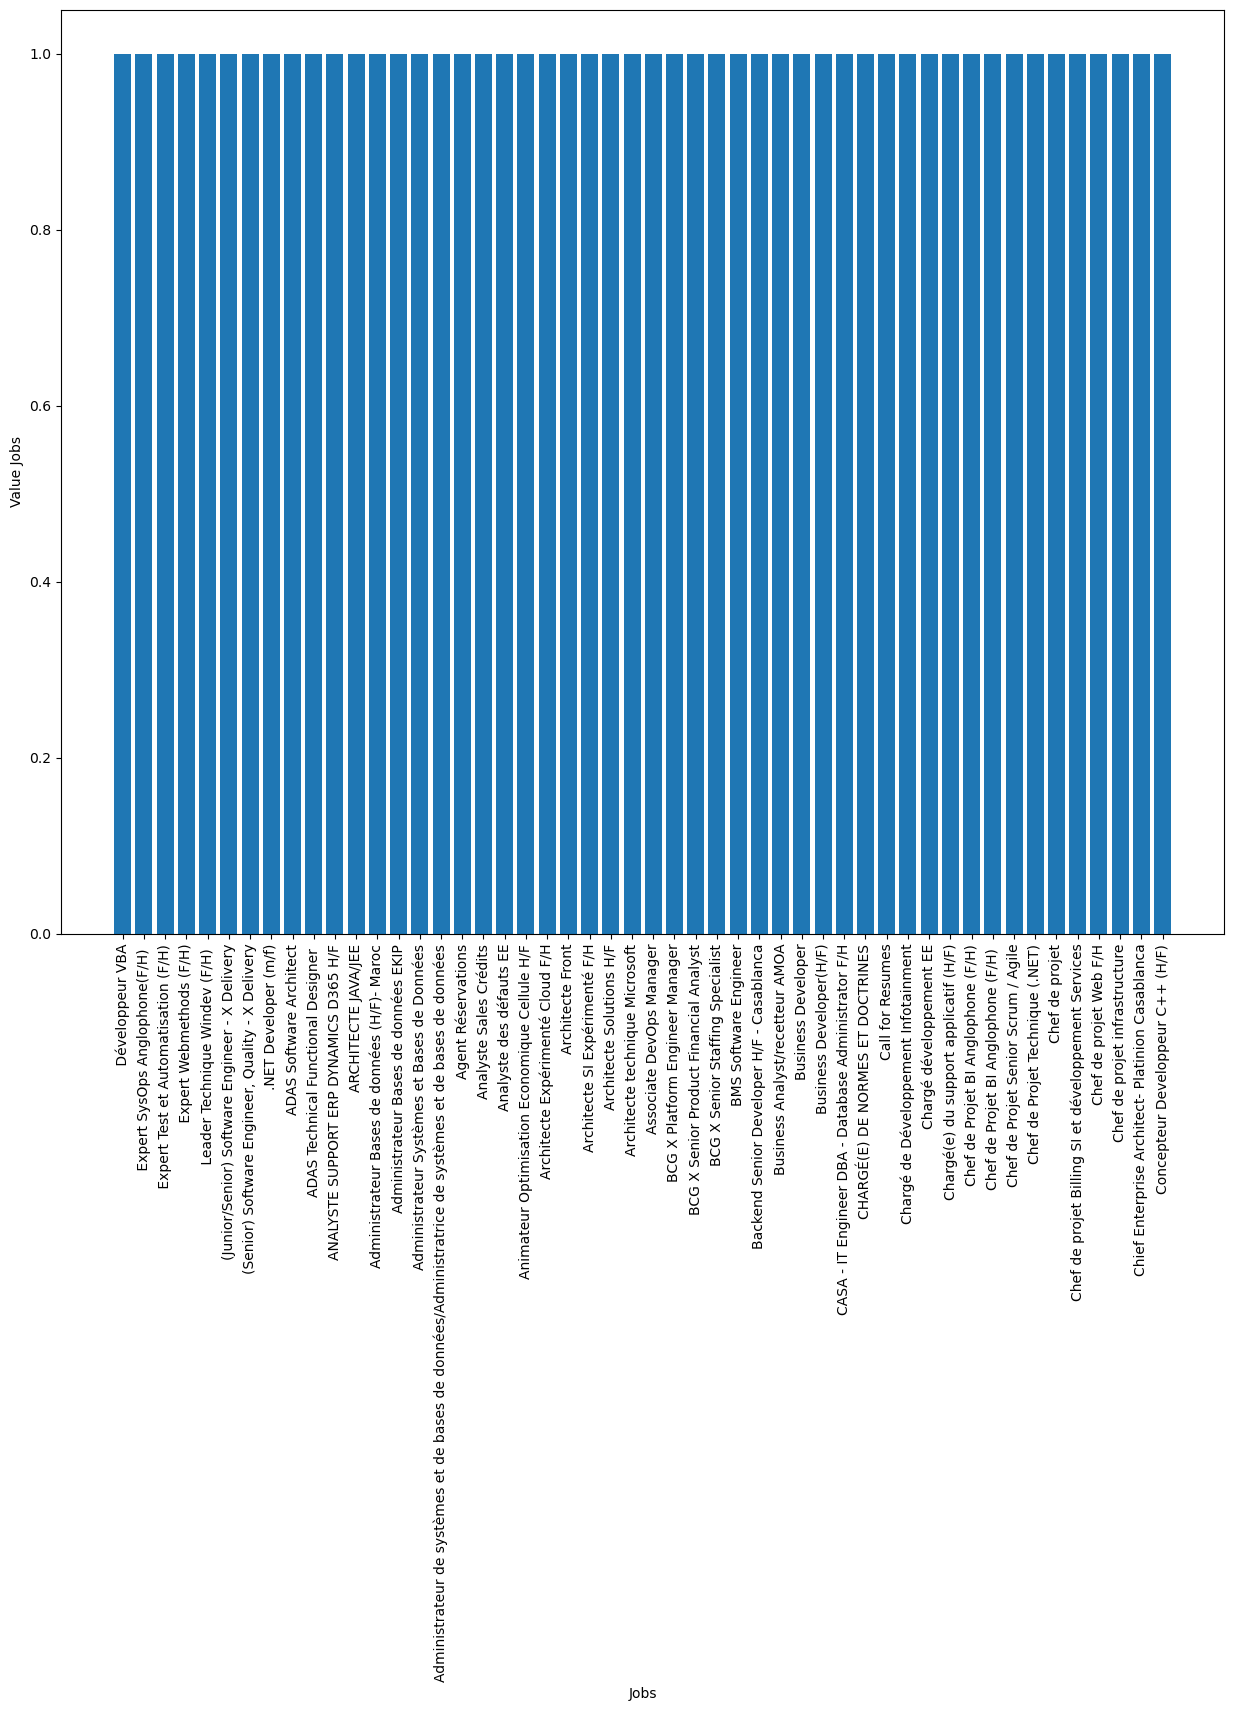

In [82]:
keys = list(job_dict.keys())[:50]
values = list(job_dict.values())[:50]
plt.figure(figsize=(15,12))
plt.bar(keys,values)
plt.xticks(rotation='vertical')
plt.xlabel("Jobs")
plt.ylabel("Value Jobs")
plt.show()

<font color=sky-blue>Interpretation</font><br>


### 3. Data Pre-processing

#### 3.1. Data Cleaning

##### Handling missing values

In [83]:
#Handling missing values
missing_values = data.isnull().sum()
total_missing = missing_values.sum()
total_cells = np.product(data.shape)
percent_missing = (total_missing/total_cells)*100
print(missing_values)
print("Percentage of missing values:",percent_missing)

Job                    0
Company                0
City                   0
Work Type              9
Work Model            29
Salary               257
Experience Level      70
Skills                 8
Skills_translated      0
dtype: int64
Percentage of missing values: 16.126242974492


In [84]:
#remove column salary because its empty
data.drop(columns=["Salary"], inplace=True)#True means drop original dataframe, False return new dataframe without modifying new dataframe

##### Filling in missing values

In [85]:
data = data.fillna(method='ffill')
data['Experience Level'] = data['Experience Level'].fillna(value='Associate')
data.head()

C:\Users\info\AppData\Local\Temp\ipykernel_10272\3945319758.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


,Job,Company,City,Work Type,Work Model,Experience Level,Skills,Skills_translated
0,Manager Data et Analytics F/H,Deloitte,"Mechouar, Casablanca-Settat, Morocco (Hybrid)",Full-time,Hybrid,Associate,"Coaching, DWH, ETL, Esprit, Microsoft Business...","Coaching, DWH, ETL, Esprit, Microsoft Business..."
1,Data Analyst Senior,Leyton,Casablanca Metropolitan Area (On-site),Full-time,On-site,Mid-Senior level,"CRM, Microsoft Excel, PowerPoint, Python, Sale...","CRM, microsoft Excel, PowerPoint, Python, Sale..."
2,Data Engineer F/H,Zenika,Casablanca Metropolitan Area (Hybrid),Full-time,Hybrid,Mid-Senior level,"Apache Kafka, Apache Spark, Google Cloud Platf...","Apache Kafka, Apache Spark, Google Cloud Plate..."
3,Senior Data Scientist,Leyton,"Casablanca-Settat, Morocco (Hybrid)",Full-time,Hybrid,Associate,"Decision Trees, Linear Regression, Python, Sup...","Decision Trees, Linear Regression, Python, Sup..."
4,Backend Senior Developer H/F - Casablanca,Eskimoz,Casablanca Metropolitan Area (Hybrid),Full-time,Hybrid,Mid-Senior level,"PHP, الإنجليزية, الاتصالات ثنائية اللغة, التوا...","Php, English, bilateral communications, commun..."


In [86]:
data.isna().sum()

Job                  0
Company              0
City                 0
Work Type            0
Work Model           0
Experience Level     0
Skills               0
Skills_translated    0
dtype: int64

##### Text Cleaning

In [103]:
#Functions using NLP
def lowercase(text):
  return text.lower()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_stopwords(tokens):
    words = set(stopwords.words('french'))
    filtered_tokens = [word for word in tokens if word not in words]
    return filtered_tokens

def tokenization(text):
    return word_tokenize(text)

def correct_spelling(text):
  textblob = TextBlob(text)
  correction = str(textblob.correct())
  return correction

def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens) 

def remove_digits(text):
    if not isinstance(text, str):
        text = str(text)
    return ''.join([char for char in text if not char.isdigit()])


In [104]:
#Fonction principale
def pretraitement(text):
    text = remove_digits(text)
    text = lowercase(text)
    text = remove_punctuation(text)
    tokens = tokenization(text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize(tokens)
    return tokens

In [107]:
#Apply functions to non numerical columns
data['processed_Job'] = data['Job'].apply(pretraitement)
data['processed_Company'] = data['Company'].apply(pretraitement)
data['processed_City'] = data['City'].apply(pretraitement)
data['processed_Skills_translated'] = data['Skills_translated'].apply(pretraitement)

data.head()

,Job,Company,City,Work Type,Work Model,Experience Level,Skills,Skills_translated,processed_Job,processed_Company,processed_City,processed_Skills_translated
0,Manager Data et Analytics F/H,Deloitte,"Mechouar, Casablanca-Settat, Morocco (Hybrid)",Full-time,Hybrid,Associate,"Coaching, DWH, ETL, Esprit, Microsoft Business...","Coaching, DWH, ETL, Esprit, Microsoft Business...",manager data analytics fh,deloitte,mechouar casablancasettat morocco hybrid,coaching dwh etl esprit microsoft business int...
1,Data Analyst Senior,Leyton,Casablanca Metropolitan Area (On-site),Full-time,On-site,Mid-Senior level,"CRM, Microsoft Excel, PowerPoint, Python, Sale...","CRM, microsoft Excel, PowerPoint, Python, Sale...",data analyst senior,leyton,casablanca metropolitan area onsite,crm microsoft excel powerpoint python salesfor...
2,Data Engineer F/H,Zenika,Casablanca Metropolitan Area (Hybrid),Full-time,Hybrid,Mid-Senior level,"Apache Kafka, Apache Spark, Google Cloud Platf...","Apache Kafka, Apache Spark, Google Cloud Plate...",data engineer fh,zenika,casablanca metropolitan area hybrid,apache kafka apache spark google cloud platefo...
3,Senior Data Scientist,Leyton,"Casablanca-Settat, Morocco (Hybrid)",Full-time,Hybrid,Associate,"Decision Trees, Linear Regression, Python, Sup...","Decision Trees, Linear Regression, Python, Sup...",senior data scientist,leyton,casablancasettat morocco hybrid,decision tree linear regression python support...
4,Backend Senior Developer H/F - Casablanca,Eskimoz,Casablanca Metropolitan Area (Hybrid),Full-time,Hybrid,Mid-Senior level,"PHP, الإنجليزية, الاتصالات ثنائية اللغة, التوا...","Php, English, bilateral communications, commun...",backend senior developer hf casablanca,eskimoz,casablanca metropolitan area hybrid,php english bilateral communication communicat...


##### Feature Encoding: One Hot Encoding

##### Text Vectorization: TF-IDF

##### Devide data Train set/Test set

### 4. Modeling

### 5. Evaluation